<a href="https://colab.research.google.com/github/pacnpacn/BUGAN/blob/master/script_load3Dobj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#right click shared folder IRCMS_GAN_collaborative_database and "Add shortcut to Drive" to My drive
%cd drive/My Drive/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj/
!ls

/content/drive/.shortcut-targets-by-id/1ylB2p6N0qQ-G4OsBuwcZ9C0tsqVu9ww4/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj
generated_files  maple_3.obj	     old_1.obj	script_GANvoxel1.ipynb
maple_1.obj	 maple_example2.mtl  old_2.obj	script_load3Dobj.ipynb
maple_2.obj	 maple_example2.obj  old_3.obj


In [3]:
!pip install open3d

#add open3d to process voxel, mesh, and point cloud

In [4]:
import open3d as o3d
import numpy as np

In [33]:
mesh = o3d.io.read_triangle_mesh('maple_3.obj')

[Open3D WARNING] Read OBJ failed: Material file [ maple_3.mtl ] not found.
Failed to load material file(s). Use default material.



In [ ]:
# voxel_size=1. initial:10 mins; voxel_size=.5 initial:20 mins; voxel_size=.3 initial:88 mins
vox = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, 0.3)  

In [ ]:
print(vox.dimension())
print(vox.origin)
print(vox.voxel_size)

In [ ]:
voxels = vox.get_voxels()

In [ ]:
box = vox.get_oriented_bounding_box()
print(box.center)
print(box.extent)
print(np.array(box.get_box_points()))

In [ ]:
boxa = vox.get_axis_aligned_bounding_box()
print(boxa.get_center())
print(boxa.get_extent())
print(np.array(boxa.get_box_points()))

In [ ]:
o3d.io.write_voxel_grid('generated_files/maple_3_voxel_size03.ply', vox)

#visualization

In [29]:
def voxel2arrayCentered(voxel, tree_size_scale = 1):
    array_size = np.array([250,250,250])
    vox_array = np.zeros(array_size, dtype=int)  
    tree_size = np.array(voxel.get_axis_aligned_bounding_box().get_extent())
    tree_size = np.ceil(tree_size / tree_size_scale)    #voxel_size = tree_size_scale
    tree_center = (np.ceil(tree_size / 2)).astype(int)

    vox_list = voxel.get_voxels()
    for vox in vox_list:
        coord = vox.grid_index
        #center the tree
        coord = coord - tree_center + (array_size/2)
        coord = tuple(coord.astype(int))

        vox_array[coord] = 1.

    return vox_array

In [15]:
#note that the voxel_size of vox is 0.3, so we scale it back to one for indexing
vox_array = voxel2arrayCentered(vox, 0.3)

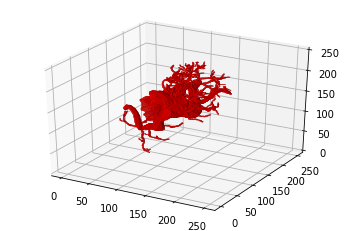

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array, facecolors='red')

plt.show()

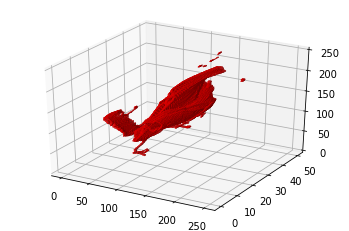

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array[:,100:150, :], facecolors='red')    # array index 1 is height of tree

plt.show()

check convert from dense array back to voxel

In [18]:
def array2voxel(array):
    coord_list = []
    x,y,z = array.shape
    for i in range(x):
        for j in range(y):
            for k in range(z):
                if array[i,j,k] > 0.5:
                    coord_list.append([i,j,k])

    return np.array(coord_list)


In [19]:
voxel_list = array2voxel(vox_array)

In [20]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(voxel_list)
vox_rebuild = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, 1.) 

In [23]:
vox_list = vox_rebuild.get_voxels()

In [30]:
#turn back to array and visualize
vox_array_rebuild = voxel2arrayCentered(vox_rebuild, 1)

In [32]:
print(np.sum(vox_array_rebuild))
print(np.sum(vox_array))

75723
75723


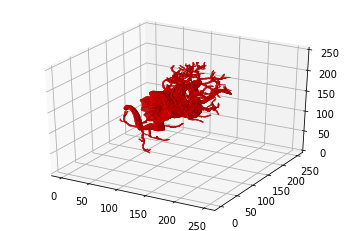

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array_rebuild, facecolors='red') 

plt.show()